In [164]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split as tts 
from sklearn.preprocessing import StandardScaler as SS, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
# Data cleaning, drop Nan and reset index 
df = data.dropna().reset_index(drop=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [87]:
# Check no nan 
np.where(np.isnan(df["stroke"]))

(array([], dtype=int64),)

In [38]:
## Examine relationship 
# heart_disease vs stroke 
hd = df[["heart_disease","stroke"]]
idx_hd = hd["heart_disease"]==1
hd_pos = hd[idx_hd]
hd_st_idx = hd_pos["stroke"]==1
hd_st_pos = hd_pos[hd_st_idx]
# Percentage of heart disease pt having stroke 
len(hd_st_pos)/len(hd_pos)

0.1646090534979424

In [39]:
# hypertension vs stroke
hp = df[["hypertension","stroke"]]
idx_hp = hp["hypertension"]==1
hp_pos = hp[idx_hp]
idx_hp_st = hp_pos["stroke"]==1
hp_st_pos = hp_pos[idx_hp_st]
len(hp_st_pos)/len(hp_pos) # percentage of hypertension pt having stroke 

0.13303769401330376

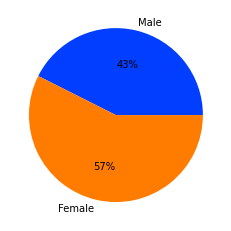

In [56]:
## Gender 
gender = df[["gender","stroke"]]
idx_st = gender["stroke"]==1
st_pos = gender[idx_st]
idx_male = st_pos["gender"] == "Male"
idx_female = st_pos["gender"] == "Female"
st_male = st_pos[idx_male]
st_female = st_pos[idx_female]
male_st_per = len(st_male)/len(st_pos)
female_st_per = len(st_female)/len(st_pos)

# create pie chart 
data = [male_st_per, female_st_per]
keys = ['Male', 'Female']
palette_color = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

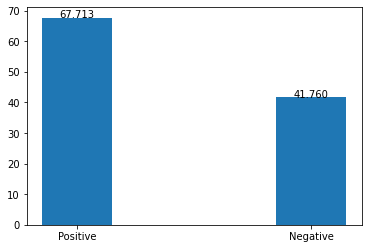

In [85]:
## Age 
age = df[["age", "stroke"]]
idx_st = df["stroke"]==1
st_pos = age[idx_st]
ave_age_st_pos = np.average(st_pos["age"])
idx_st = df["stroke"]==0
st_neg = age[idx_st]
ave_age_st_neg = np.average(st_neg["age"])

# Create bar chart
plt.bar(x=["Positive","Negative"], height=[ave_age_st_pos,ave_age_st_neg], width=0.3, align='center')
plt.text("Positive", ave_age_st_pos, str("{:.3f}".format(ave_age_st_pos)), ha='center')
plt.text("Negative", ave_age_st_neg, str("{:.3f}".format(ave_age_st_neg)), ha='center')
plt.show()

### Assembling train/test data

In [143]:
X = df.loc[:,'gender':'smoking_status']
y = df['stroke']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
4904,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
4905,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
4906,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
4907,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [155]:
# Convert categorical string to integer using LabelEncoder
le = LabelEncoder()
X_encode = pd.DataFrame(data=None)
# LabelEncode one column at a time 
for i in X.columns.array:
  X_encode[i] = le.fit_transform(X[i].astype(str))
X_encode

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,85,0,1,1,2,1,1547,239,1
1,1,100,0,1,1,2,0,242,198,2
2,0,65,0,0,1,2,1,1122,217,3
3,0,98,1,0,1,3,0,1131,113,2
4,1,101,0,0,1,2,1,1180,163,1
...,...,...,...,...,...,...,...,...,...,...
4904,0,26,0,0,0,4,0,137,59,0
4905,0,101,0,0,1,3,1,773,273,2
4906,0,50,0,0,1,3,0,2955,179,2
4907,1,68,0,0,1,2,0,1102,129,1


In [156]:
# split train/test data 
X_train, X_test, y_train, y_test = tts(X_encode, y, test_size=0.33, random_state=146)

In [196]:
# Set up SVC in SVM and fit the model
model = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)
model.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True)

In [197]:
# Got the precision, which is also included in classification report 
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.95855728, 0.04144272],
       [0.95855728, 0.04144272],
       [0.95855728, 0.04144272],
       ...,
       [0.95855729, 0.04144271],
       [0.9585573 , 0.0414427 ],
       [0.95855728, 0.04144272]])

In [198]:
# Convert probability to catergorical labels
y_pred = np.argmax(y_pred_proba, axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1543
           1       0.00      0.00      0.00        77

    accuracy                           0.95      1620
   macro avg       0.48      0.50      0.49      1620
weighted avg       0.91      0.95      0.93      1620



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Interpret classification report

**Precision**: Precision is the number of true positive predictions divided by the number of true positive predictions plus the number of *false positive* predictions. It measures the proportion of positive predictions that are actually correct.

**Recall**: Recall is the number of true positive predictions divided by the number of true positive predictions plus the number of *false negative* predictions. It measures the proportion of positive cases that are correctly identified by the classifier.

**F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.

**Support**: Support is the number of instances in the test data that belong to a particular class.

### Find out which factors influence the classification the most:
Correlation Matrix


In [195]:
# Set up correlation matrix 
X_encode["stroke"]=y
df_encode = X_encode
df_encode
corr_matrix = df_encode.corr()

# report how each factor correlates with "Stroke"
for i in X_encode.columns.array:
  print(i, corr_matrix.loc[i,'stroke'])

gender 0.006757362707213232
age 0.21620519349688977
hypertension 0.1425146058811255
heart_disease 0.1379377876221929
ever_married 0.1050891438647453
work_type -0.0337560255686143
Residence_type 0.006031426465802676
avg_glucose_level -0.03533463937635116
bmi 0.04583049640079021
smoking_status 0.05155826107718213
stroke 1.0


### Results:

Age(0.22), hypertension(0.14), and heart disease(0.13) have higher correlation with stroke incidence 